In [1]:
from datascience import *
from path_data_variable import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
goats = make_array('first goat', 'second goat')

In [3]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [4]:
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

In [5]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'], dtype='<U11')

In [6]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [7]:
monty_hall_game()

['car', 'first goat', 'second goat']

In [8]:
# empty collection table
games = Table(['Guess', 'Revealed', 'Remaining'])

# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    games.append(monty_hall_game())

In [9]:
games.show(3)

In [10]:
original_choice = games.group('Guess')
original_choice

Guess       | count
car         | 3319
first goat  | 3311
second goat | 3370

In [11]:
remaining_door = games.group('Remaining')
remaining_door

Remaining   | count
car         | 6681
first goat  | 1676
second goat | 1643

In [12]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item        | Original Door | Remaining Door
car         | 3319          | 6681
first goat  | 3311          | 1676
second goat | 3370          | 1643

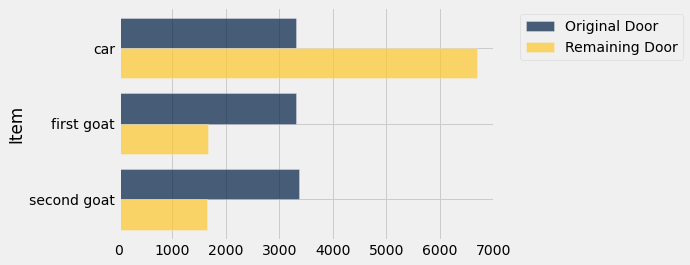

In [13]:
combined.barh(0)